In [1]:
import numpy as np
import matplotlib.pyplot as plt

Simulation parameters

The number of points used in the simulation equals the main clock frequency = 2048 Hz. The sampling frequency is 2048 Hz / 64 = 32 Hz.

The input signal is a truncated  sin(wt)/(wt) function.

In [2]:
points = 2**11                  # 2048 points
S = 64                          # sampling period
t = np.arange(1, points + 1)    # clock-times (x 2048) used in the simulation
N = 128                         # number of points used in the modulating function

In [3]:
# 生成截断的sinc函数
tt = 8 * np.pi * np.linspace(0, 1, N) - 4 * np.pi + 0.001  # 避免0/0
w = (np.sin(tt) / tt).reshape(-1, 1)  # 转换为列向量，与MATLAB保持一致

# 插值得到调制函数
tw = np.arange(N)
tw = tw * points / (N - 1)
y = np.interp(t, tw, w.flatten())  # 插值

figure(1) --> Fig 1.5 page 6

Text(1024.0, -0.5, '1 sec')

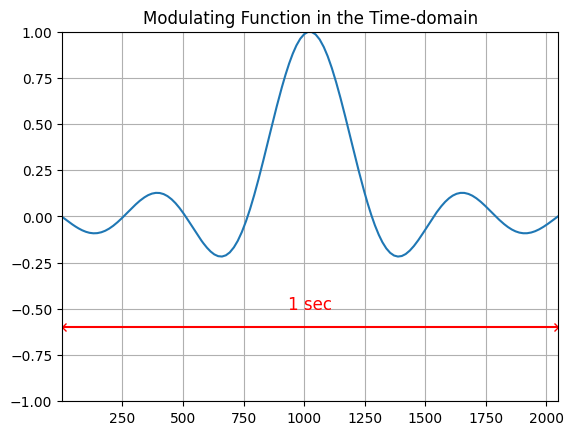

In [4]:
plt.figure(1)
plt.plot(y)
plt.grid(True)
plt.title('Modulating Function in the Time-domain')
plt.axis([1, points, -1, 1])

# 计算频谱并绘制参考线（无需hold，直接连续plot即可）
sp = np.abs(np.fft.fft(y))
plt.plot([1, points], [-0.6, -0.6], 'r-x')  # 直接叠加绘制
plt.text(points/2, -0.5, '1 sec', horizontalalignment='center', 
         fontsize=12, color='r')

figure(2) --> Fig 1.6 page 7

(1.0, 40.0)

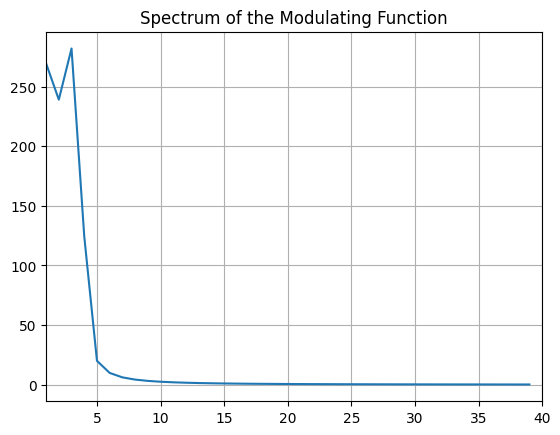

In [5]:
# 图2：调制函数的频谱
plt.figure(2)
plt.plot(sp[:40])  # 取前40点
plt.title('Spectrum of the Modulating Function')
plt.grid(True)
plt.xlim([1, 40])

Modulation of the truncate sinc with pure sine waves

In [6]:
f1 = 1/1024   # frequencies
f2 = 3/1024
f3 = 5/1024
f4 = 7/1024

# 生成正弦波
sin1 = np.sin(2 * np.pi * f1 * t)
sin2 = np.sin(2 * np.pi * f2 * t)
sin3 = np.sin(2 * np.pi * f3 * t)
sin4 = np.sin(2 * np.pi * f4 * t)

# 分量振幅
k0 = 1
k1 = 1
k2 = 1
k3 = 1
k4 = 1.2


Weigthed superposition of components

In [7]:
yout = k0 * y + k1 * y * sin1 + k2 * y * sin2 + k3 * y * sin3 + k4 * y * sin4

Sampling

In [8]:
ysamp = np.zeros_like(yout)
index = 0  # Python使用0索引
b = S      # 采样位置

for i in range(points):
    current_i = i + 1  # 转换为MATLAB的1-based索引
    if current_i == b:
        ysamp[i] = yout[index] * S
        b += S
        index += S  # 注意：原MATLAB代码此处可能有逻辑问题，保持一致

figure(3) --> Fig 1.7 page 7

(1.0, 100.0)

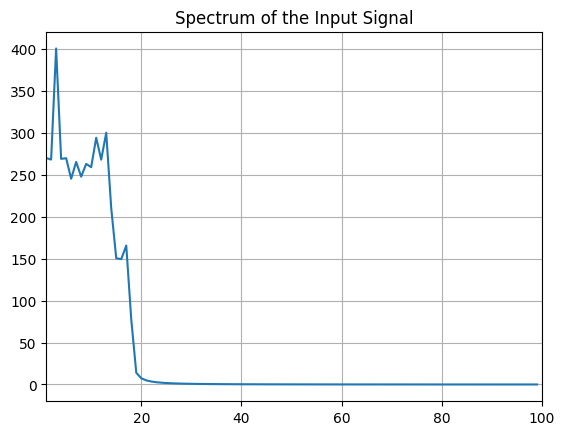

In [9]:
# 采样前信号的频谱
sp = np.abs(np.fft.fft(yout))
plt.figure(3)
plt.plot(sp[:100])
plt.title('Spectrum of the Input Signal')
plt.grid(True)
plt.xlim([1, 100])

figure(4) --> Fig 1.8 page 8

(1.0, 100.0)

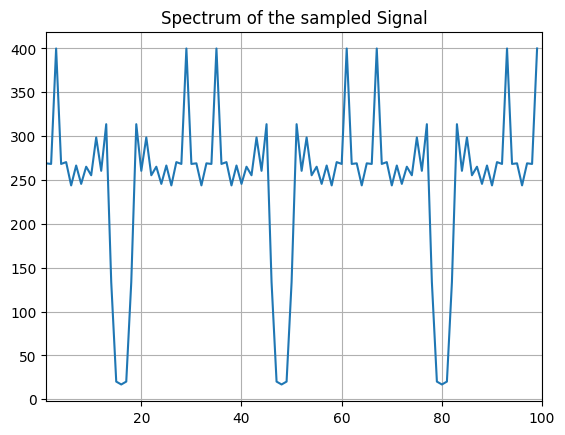

In [10]:
# 采样后信号的频谱
sp_samp = np.abs(np.fft.fft(ysamp))
plt.figure(4)
plt.plot(sp_samp[:100])
plt.title('Spectrum of the sampled Signal')
plt.grid(True)
plt.xlim([1, 100])